In [1]:
#Der Stromverbrauch verteilte sich 2023 wie folgt: Industrie: 40,0 %, Private Haushalte: 28,0 %, 
#Kleinverbraucher – hierzu zählen Handel, Gewerbe, Dienstleistungen sowie öffentliche Einrichtungen: 26,7 % und Verkehr: 3,3 %.

#QUELLE : https://www.weltenergierat.de/energie-fuer-deutschland-2024/energie-in-deutschland-zahlen-und-fakten

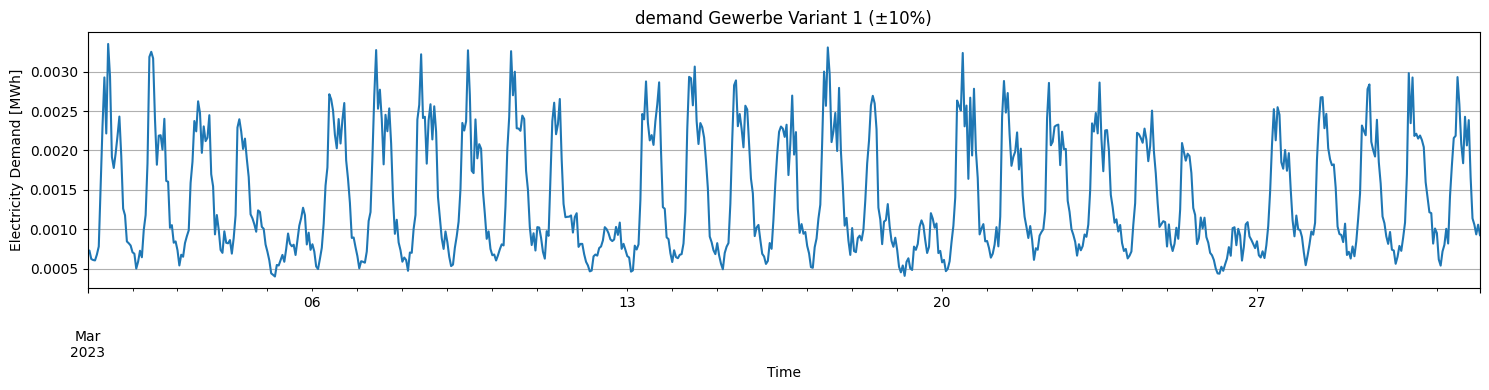

,tot_demand_Gewerbe_variants_[MWh]
2023-03-01 00:00:00,0.008947
2023-03-01 01:00:00,0.007373
2023-03-01 02:00:00,0.006833
2023-03-01 03:00:00,0.007078
2023-03-01 04:00:00,0.008424
...,...
2023-03-31 19:00:00,0.013780
2023-03-31 20:00:00,0.012600
2023-03-31 21:00:00,0.011896
2023-03-31 22:00:00,0.011621


In [2]:
from demandlib.bdew import ElecSlp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

e_slp = ElecSlp(year=2023)                     # general business
g0_annual = 12000

profile_g0 = e_slp.get_scaled_profiles({"g0": g0_annual})

demand_Gewerbe = profile_g0["g0"].resample("1h").sum()
demand_Gewerbe = demand_Gewerbe["2023-03-01":"2023-03-31"] / 1000
demand_Gewerbe= demand_Gewerbe.to_frame(name="Demand [MWh]")
#display(demand_Gewerbe.sum())

np.random.seed(42)

#  Generate 12 varied profiles
gewerbe_variants_profiles = []

for i in range(12):
    variation = np.random.uniform(0.8, 1.2, size=len(demand_Gewerbe))
    modified_values = demand_Gewerbe["Demand [MWh]"].values * variation
    
    df_variant = pd.DataFrame(modified_values, index=demand_Gewerbe.index, columns=[f"demand_Gewerbe_{i+1}_[MWh]"])
    
    gewerbe_variants_profiles.append(df_variant)

all_gewerbe_variants = pd.concat(gewerbe_variants_profiles, axis=1)

all_gewerbe_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Gewerbe Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Gewerbe = all_gewerbe_variants.sum(axis=1).to_frame(name="tot_demand_Gewerbe_variants_[MWh]")
display(tot_Gewerbe)
#all_gewerbe_variants.head(5)

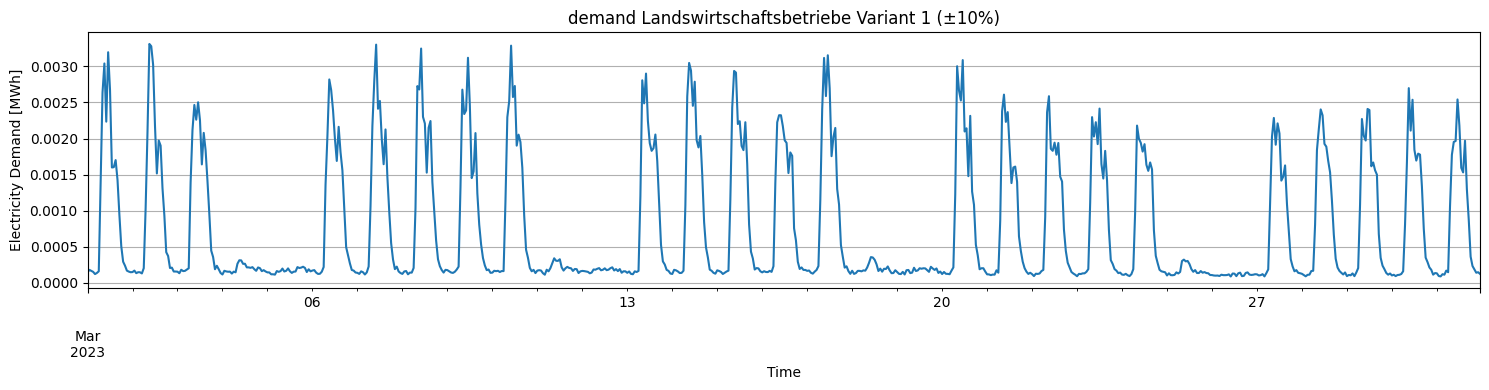

,tot_demand_Landswirtschaftsbetriebe_variants_[MWh]
2023-03-01 00:00:00,0.001588
2023-03-01 01:00:00,0.001561
2023-03-01 02:00:00,0.001568
2023-03-01 03:00:00,0.001444
2023-03-01 04:00:00,0.001425
...,...
2023-03-31 19:00:00,0.002345
2023-03-31 20:00:00,0.001904
2023-03-31 21:00:00,0.001500
2023-03-31 22:00:00,0.001370


In [3]:
from demandlib.bdew import ElecSlp
import pandas as pd

e_slp = ElecSlp(year=2023)            # Business on weekdays 8 a.m. - 6 p.m.
g1_annual = 6000

profile_g1 = e_slp.get_scaled_profiles({"g1": g1_annual})

demand_Landswirtschaftsbetriebe = profile_g1["g1"].resample("1h").sum()
demand_Landswirtschaftsbetriebe = demand_Landswirtschaftsbetriebe["2023-03-01":"2023-03-31"] / 1000
demand_Landswirtschaftsbetriebe = demand_Landswirtschaftsbetriebe.to_frame(name="Demand [MWh]")
#demand_Landswirtschaftsbetriebe


np.random.seed(42)

#  Generate 12 varied profiles
Landswirtschaftsbetriebe_variants_profiles = []

for i in range(10):
    variation2 = np.random.uniform(0.8, 1.2, size=len(demand_Landswirtschaftsbetriebe))
    modified_values2 = demand_Landswirtschaftsbetriebe["Demand [MWh]"].values * variation2
    
    df_variant2 = pd.DataFrame(modified_values2, index=demand_Landswirtschaftsbetriebe.index, columns=[f"demand_Landswirtschaftsbetriebe_{i+1}_[MWh]"])
    
    Landswirtschaftsbetriebe_variants_profiles.append(df_variant2)

all_Landswirtschaftsbetriebe_variants = pd.concat(Landswirtschaftsbetriebe_variants_profiles, axis=1)

all_Landswirtschaftsbetriebe_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Landswirtschaftsbetriebe Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Landswirtschaftsbetriebe = all_Landswirtschaftsbetriebe_variants.sum(axis=1).to_frame(name="tot_demand_Landswirtschaftsbetriebe_variants_[MWh]")
display(tot_Landswirtschaftsbetriebe)
#all_Landswirtschaftsbetriebe_variants.head(5)

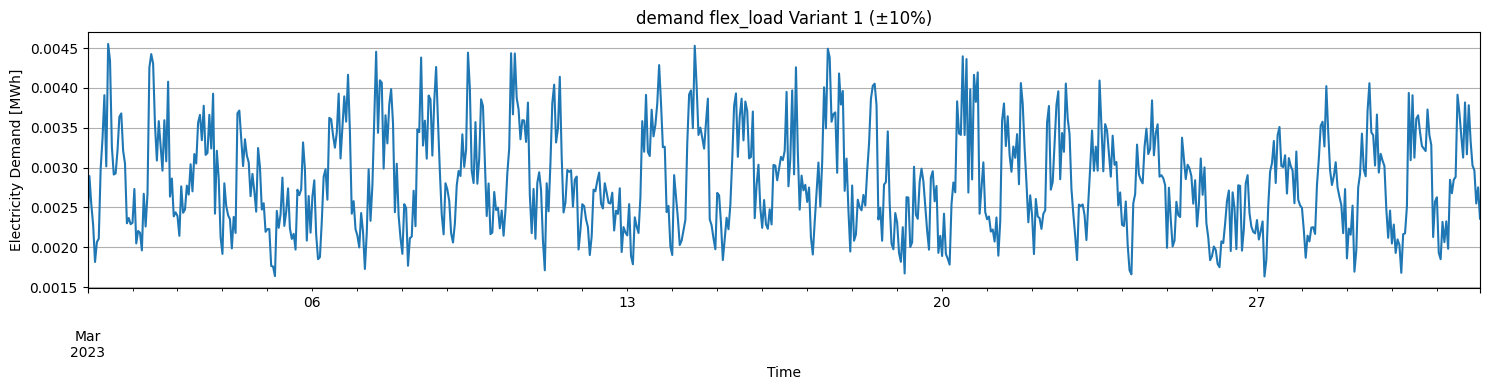

,tot_demand_flex_load_variants_[MWh]
2023-03-01 00:00:00,0.033352
2023-03-01 01:00:00,0.034229
2023-03-01 02:00:00,0.032353
2023-03-01 03:00:00,0.030626
2023-03-01 04:00:00,0.029558
...,...
2023-03-31 19:00:00,0.042981
2023-03-31 20:00:00,0.041250
2023-03-31 21:00:00,0.038039
2023-03-31 22:00:00,0.035602


In [4]:
from demandlib.bdew import ElecSlp
import pandas as pd

e_slp = ElecSlp(year=2023)
g3_annual = 25000
profile_g3 = e_slp.get_scaled_profiles({"g3": g3_annual})   #Continuous business

demand_flex_load = profile_g3["g3"].resample("1h").sum()
demand_flex_load = demand_flex_load["2023-03-01":"2023-03-31"] / 1000
demand_flex_load = demand_flex_load.to_frame(name="Demand [MWh]")
#demand_flex_load

np.random.seed(42)

#  Generate 12 varied profiles
flex_load_variants_profiles = []

for i in range(14):
    variation3 = np.random.uniform(0.8, 1.2, size=len(demand_flex_load))
    modified_values3 = demand_flex_load["Demand [MWh]"].values * variation3
    
    df_variant3 = pd.DataFrame(modified_values3, index=demand_flex_load.index, columns=[f"demand_flex_load_{i+1}_[MWh]"])
    
    flex_load_variants_profiles.append(df_variant3)

all_flex_load_variants = pd.concat(flex_load_variants_profiles, axis=1)

all_flex_load_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand flex_load Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_flex_load = all_flex_load_variants.sum(axis=1).to_frame(name="tot_demand_flex_load_variants_[MWh]")
display(tot_flex_load)
#all_flex_load_variants.head(5)

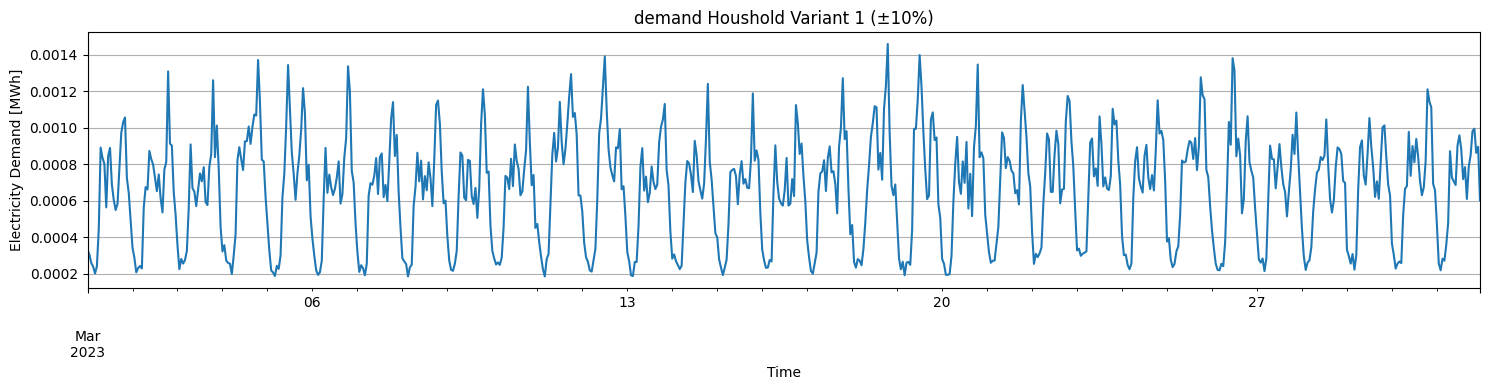

,tot_demand_Houshold_variants_[MWh]
2023-03-01 00:00:00,0.008843
2023-03-01 01:00:00,0.006443
2023-03-01 02:00:00,0.005966
2023-03-01 03:00:00,0.005805
2023-03-01 04:00:00,0.005831
...,...
2023-03-31 19:00:00,0.025631
2023-03-31 20:00:00,0.024456
2023-03-31 21:00:00,0.023249
2023-03-31 22:00:00,0.020712


In [5]:
from demandlib.bdew import ElecSlp
import pandas as pd

e_slp = ElecSlp(year=2023)
h0_annual = 6000
# gets 15-min energy values, summing to annual total
profile_h0 = e_slp.get_scaled_profiles({"h0": h0_annual})
# rename and convert by hour
demand_Houshold = profile_h0["h0"].resample("1h").sum()
demand_Houshold = demand_Houshold["2023-03-01":"2023-03-31"] / 1000
demand_Houshold = demand_Houshold.to_frame(name="Demand [MWh]")
#demand_Houshold

np.random.seed(42)

#  Generate 12 varied profiles
Houshold_variants_profiles = []

for i in range(25):
    variation4 = np.random.uniform(0.8, 1.2, size=len(demand_Houshold))
    modified_values4 = demand_Houshold["Demand [MWh]"].values * variation4
    
    df_variant4 = pd.DataFrame(modified_values4, index=demand_Houshold.index, columns=[f"demand_Houshold_{i+1}_[MWh]"])
    
    Houshold_variants_profiles.append(df_variant4)

all_Houshold_variants = pd.concat(Houshold_variants_profiles, axis=1)

all_Houshold_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Houshold Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Houshold = all_Houshold_variants.sum(axis=1).to_frame(name="tot_demand_Houshold_variants_[MWh]")
display(tot_Houshold)
#all_Houshold_variants.head(5)


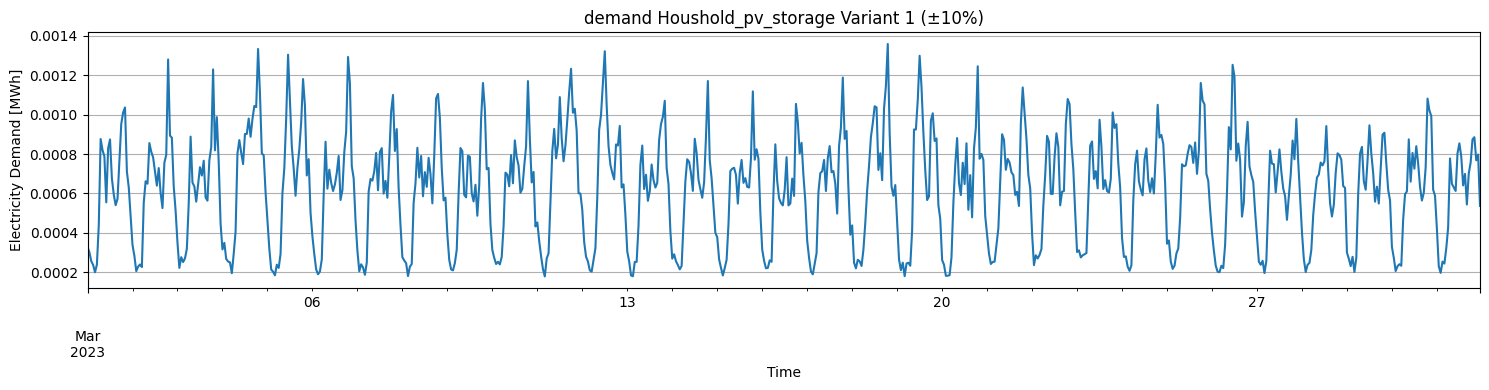

,tot_demand_Houshold_pv_storage_variants_[MWh]
2023-03-01 00:00:00,0.006949
2023-03-01 01:00:00,0.005094
2023-03-01 02:00:00,0.004668
2023-03-01 03:00:00,0.004521
2023-03-01 04:00:00,0.004555
...,...
2023-03-31 19:00:00,0.017808
2023-03-31 20:00:00,0.017515
2023-03-31 21:00:00,0.016515
2023-03-31 22:00:00,0.014665


In [6]:
from demandlib.bdew import ElecSlp
import pandas as pd

e_slp = ElecSlp(year=2023)
h0_dyn_annual = 5000
# gets 15-min energy values, summing to annual total
profile_h0_dyn = e_slp.get_scaled_profiles({"h0_dyn": h0_dyn_annual})
# rename and convert by hour
demand_Houshold_pv_storage = profile_h0_dyn["h0_dyn"].resample("1h").sum()
demand_Houshold_pv_storage = demand_Houshold_pv_storage["2023-03-01":"2023-03-31"] / 1000
demand_Houshold_pv_storage = demand_Houshold_pv_storage.to_frame(name="Demand [MWh]")
#demand_Houshold_pv_storage

np.random.seed(42)

#  Generate 12 varied profiles
Houshold_pv_storage_variants_profiles = []

for i in range(20):
    variation5 = np.random.uniform(0.8, 1.2, size=len(demand_Houshold_pv_storage))
    modified_values5 = demand_Houshold_pv_storage["Demand [MWh]"].values * variation5
    
    df_variant5 = pd.DataFrame(modified_values5, index=demand_Houshold_pv_storage.index, columns=[f"demand_Houshold_pv_storage_{i+1}_[MWh]"])
    
    Houshold_pv_storage_variants_profiles.append(df_variant5)

all_Houshold_pv_storage_variants = pd.concat(Houshold_pv_storage_variants_profiles, axis=1)

all_Houshold_pv_storage_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Houshold_pv_storage Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Houshold_pv_storage = all_Houshold_pv_storage_variants.sum(axis=1).to_frame(name="tot_demand_Houshold_pv_storage_variants_[MWh]")
display(tot_Houshold_pv_storage)

#all_Houshold_pv_storage_variants.head(5)

# total demands

In [7]:
tot_demand = tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"] + tot_Houshold["tot_demand_Houshold_variants_[MWh]"] + tot_flex_load["tot_demand_flex_load_variants_[MWh]"] + tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"]+ tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"]
tot_demand = tot_demand.to_frame(name="Demand [MWh]")
tot_demand

,Demand [MWh]
2023-03-01 00:00:00,0.059680
2023-03-01 01:00:00,0.054700
2023-03-01 02:00:00,0.051388
2023-03-01 03:00:00,0.049474
2023-03-01 04:00:00,0.049793
...,...
2023-03-31 19:00:00,0.102545
2023-03-31 20:00:00,0.097726
2023-03-31 21:00:00,0.091198
2023-03-31 22:00:00,0.083970


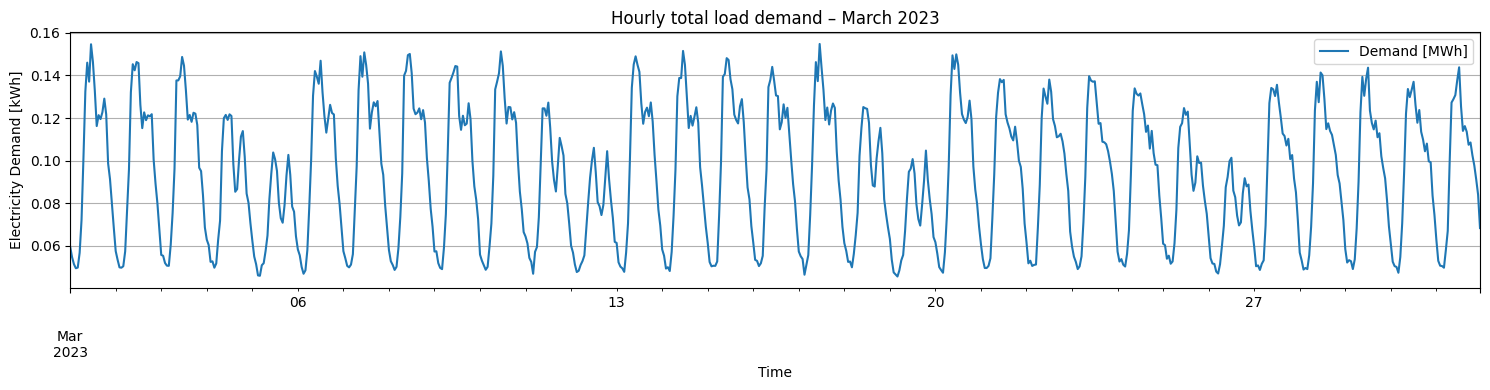

In [8]:
plt.figure(figsize=(15, 4))
tot_demand["Demand [MWh]"].plot(legend=True)
plt.title("Hourly total load demand – March 2023")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [kWh]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
import pypsa
import pandas as pd

net = pypsa.Network()

net.set_snapshots(pd.date_range("2023-03-01 00:00", "2023-03-31 23:00", freq="h"))

# Buses

In [10]:
# Grid bus and generator
net.add("Bus", "grid")
net.add("Bus","solar_bus")
net.add("Bus","demand_Gewerbe")
net.add("Bus","houshold")
net.add("Bus","houshold_pv_storage")
net.add("Bus","Landswirtschaftsbetriebe")
#net.add("Bus", "battery_bus")
net.add("Bus","flex_load")
net.add("Bus","Biomass")


Index(['Biomass'], dtype='object')

In [11]:
solar_gen = pd.read_csv("solar_simulated_march_2023.csv", header=None, names=["power[W]"])
solar_gen = solar_gen / 1000000
solar_gen.index = net.snapshots
solar_gen.head(20)


,power[W]
snapshot,
2023-03-01 00:00:00,0.000000
2023-03-01 01:00:00,0.000000
2023-03-01 02:00:00,0.000000
2023-03-01 03:00:00,0.000000
2023-03-01 04:00:00,0.000000
2023-03-01 05:00:00,0.000000
2023-03-01 06:00:00,0.000000
2023-03-01 07:00:00,0.102680
2023-03-01 08:00:00,0.199752


In [12]:
tot_Houshold_pv_storage.index = net.snapshots
tot_Houshold.index = net.snapshots
tot_flex_load.index = net.snapshots
tot_Landswirtschaftsbetriebe.index = net.snapshots
tot_Gewerbe.index = net.snapshots
tot_demand.index = net.snapshots

# Electricity price

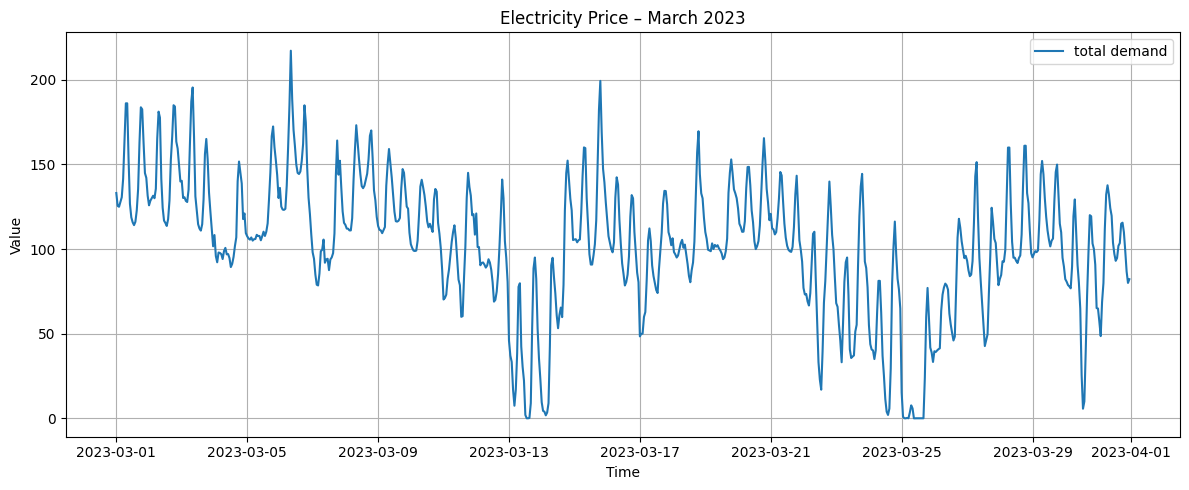

E_price    0.06
dtype: float64

In [13]:
Tou_price = pd.read_csv("electricity_price_march_2023.csv", header=None, names=["E_price"])
tou_Price = Tou_price[::8].copy()

tou_Price.loc[len(tou_Price)] = 82.19
tou_price = tou_Price.reset_index(drop=True)

tou_price.index = net.snapshots
tou_price.loc[tou_price["E_price"] <= 0, "E_price"] = 0.1

plt.figure(figsize=(12, 5))
plt.plot(tou_price,  label="total demand")
plt.title("Electricity Price – March 2023")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
#tou_price.max()
tou_price.min()

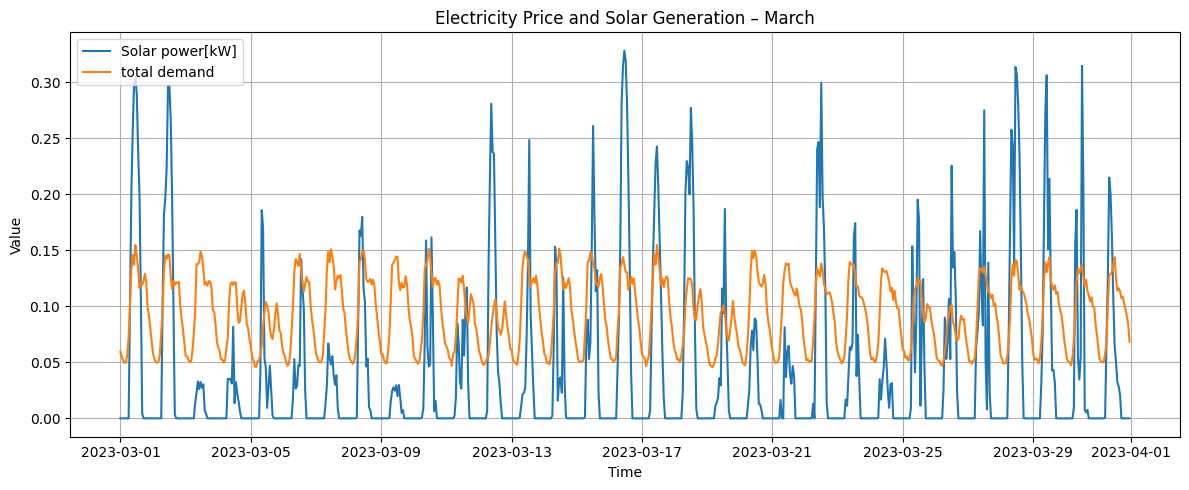

In [14]:
plt.figure(figsize=(12, 5))
plt.plot( solar_gen["power[W]"], label="Solar power[kW]")
plt.plot(tot_demand["Demand [MWh]"],  label="total demand")

plt.title("Electricity Price and Solar Generation – March")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
df_diff = tot_demand["Demand [MWh]"]-  solar_gen["power[W]"]
display(df_diff.max())
display(df_diff.min())

0.12912038153346622

-0.2004251148794797

# All generators

In [16]:
net.add("Generator", "grid_generator",
        bus="grid", p_nom=1e6,
        marginal_cost=tou_price["E_price"],
        capital_cost=0)

net.add("Generator", "solar",
        bus="solar_bus",
        p_nom=1,
        p_max_pu= solar_gen["power[W]"],
        marginal_cost= 0.02)   #*tou_price["E_price"])

net.add("Generator", "Biomass",    # source: https://www.drax.com/opinion/the-role-of-biomass-in-securing-reliable-power-generation/#:~:text=globally
         bus="Biomass", p_nom=0.06,   # find a source how much percent should be based load covering
         marginal_cost= 0.05)  #*tou_price["E_price"],  # source : zotero: biomass price


Index(['Biomass'], dtype='object')

# Loads (g0,g1,H0...)

In [17]:
net.add("Load","demand_Gewerbe",
        bus="demand_Gewerbe",
        p_set=tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"])

net.add("Load","demand_houshold",
        bus="houshold",
        p_set=tot_Houshold["tot_demand_Houshold_variants_[MWh]"])

net.add("Load","demand_houshold_pv_storage",
        bus="houshold_pv_storage",
        p_set=tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"])

net.add("Load","demand_Landswirtschaftsbetriebe",
        bus="Landswirtschaftsbetriebe",
        p_set=tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"])

net.add("Load","demand_flex_load",
        bus="flex_load",
        p_set=tot_flex_load["tot_demand_flex_load_variants_[MWh]"])

Index(['demand_flex_load'], dtype='object')

# Links from GRID to LOADS

In [18]:

net.add("Link", "to_gewerbe",bus0="grid", bus1="demand_Gewerbe",p_nom=10, marginal_cost=200)
net.add("Link", "to_houshold",bus0="grid", bus1="houshold",p_nom=10, marginal_cost=200)
net.add("Link", "to_houshold_pv_storage",bus0="grid", bus1="houshold_pv_storage",p_nom=10, marginal_cost=200)
net.add("Link", "to_Landswirtschaftsbetriebe",bus0="grid", bus1="Landswirtschaftsbetriebe",p_nom=10, marginal_cost=200)
net.add("Link", "to_flex_load",bus0="grid", bus1="flex_load",p_nom=10, marginal_cost=200)

Index(['to_flex_load'], dtype='object')

# Links from SOLAR to LOADS

In [19]:

net.add("Link", "solar_to_gewerbe", bus0="solar_bus", bus1="demand_Gewerbe", p_nom=0.4, marginal_cost=100)
net.add("Link", "solar_to_houshold", bus0="solar_bus", bus1="houshold", p_nom=0.4, marginal_cost=100)
net.add("Link", "solar_to_pvhouse", bus0="solar_bus", bus1="houshold_pv_storage", p_nom=0.4, marginal_cost=100)
net.add("Link", "solar_to_landwirtschaft", bus0="solar_bus", bus1="Landswirtschaftsbetriebe", p_nom=0.4, marginal_cost=100)
net.add("Link", "solar_to_flex_load", bus0="solar_bus", bus1="flex_load", p_nom=0.4, marginal_cost=100)

Index(['solar_to_flex_load'], dtype='object')

# Links from BIOMASS to the LOADS

In [20]:
net.add("Link", "Biomass_to_gewerbe", bus0="Biomass", bus1="demand_Gewerbe", p_nom=0.06, marginal_cost=100)
net.add("Link", "Biomass_to_houshold", bus0="Biomass", bus1="houshold", p_nom=0.06, marginal_cost=100)
net.add("Link", "Biomass_to_pvhouse", bus0="Biomass", bus1="houshold_pv_storage", p_nom=0.06, marginal_cost=100)
net.add("Link", "Biomass_to_landwirtschaft", bus0="Biomass", bus1="Landswirtschaftsbetriebe", p_nom=0.06, marginal_cost=100)
net.add("Link", "Biomass_to_flex_load", bus0="Biomass", bus1="flex_load", p_nom=0.06, marginal_cost=100)

Index(['Biomass_to_flex_load'], dtype='object')

In [21]:
#df_EVs = pd.read_csv("charging_plan_generated_by _python.csv", index_col=0, parse_dates=True)
#df_EVs.index = net.snapshots
#df_EVs

# tesla model 3 RWD 2022 : Battery capacity = 62 kwh         14.4 kwh / 100 km
# vw id3 pro :  Battery capacity = 58 kWh         15.6 kwh / 100 km
# vw id7 :  Battery capacity = 77 kW·h       14.1 kwh / 100 km
# BMW i4 M50 :   Bttery capacity =  83.9 kwh   22.5 kwh/ 100 km
# Benz EQE 300 :   Bttery capacity = 89 kwh   16.4 kwh/ 100 km


# EVs buses

In [22]:
charging_profiles = pd.read_csv("charging_profiles.csv", index_col=0, parse_dates=True)
net.set_snapshots(charging_profiles.index)

for ev_name in charging_profiles.columns:
    ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
    
    ev_bus = f"{ev_id}_bus"
    load_name = f"{ev_id}_load"
    link_name = f"{ev_id}_charge"
    Link_name = f"{ev_id}_Charge"

    consumption_series = charging_profiles[ev_name] / 1000

    net.add("Bus", ev_bus)

    net.add("Link", link_name,
            bus0="grid",   
            bus1=ev_bus,   
            p_nom=11,      
            marginal_cost=200,    # Tibber, aWATTar
            committable=False)
    
    net.add("Link", Link_name,
            bus0="solar_bus",   
            bus1=ev_bus,   
            p_nom=11,      
            marginal_cost=100,
            committable=False)

    net.add("Load", load_name,
            bus=ev_bus,
            p_set=consumption_series)


In [23]:

'''ev_power = 13 / 1000
initial_energy = 25 / 1000
roundtrip_eff = 0.95



for i in range(20):
    ev_name = f"EV{i+1}"                                                                                                           
    ev_bus = f"ev{i+1}_bus"
    
    profile_index = (i % 5) + 1
    consumption_col = f"power_consumption{profile_index}_kW"
    availability_col = f"availability{profile_index}"
    Battery_capacity_col = f"Battery_capacity{profile_index}_kwh"

    consumption_series = df_EVs[consumption_col]
    availability_series = df_EVs[availability_col]
    Battery_capacity_series = df_EVs[Battery_capacity_col]

    net.add("Bus", ev_bus)
    battery_capacity = Battery_capacity_series.iloc[0] / 1000
    net.add("Store", f"{ev_name}_store",
            bus=ev_bus,
            e_nom= battery_capacity,
            e_initial=initial_energy,
            marginal_cost=0,
            e_cyclic=False)

    net.add("Link", f"{ev_name}_charge",
            bus0="grid", bus1=ev_bus,
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=0,
            committable=True)
    
    net.add("Link", f"{ev_name}_Charge",
            bus0="solar_bus", bus1=ev_bus,
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=0,
            committable=True)

    net.add("Link", f"{ev_name}_CHarge",
            bus0="Biomass", bus1=ev_bus,
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=0,
            committable=True)
    
    net.add("Link", f"{ev_name}_discharge",
            bus0=ev_bus, bus1="grid",
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=-0.12*tou_price["E_price"],  #-132 should be based on a Paper
            committable=True)

    net.add("Load", f"{ev_name}_load",
            bus=ev_bus,
            p_set=consumption_series/1000)'''


'ev_power = 13 / 1000\ninitial_energy = 25 / 1000\nroundtrip_eff = 0.95\n\n\n\nfor i in range(20):\n    ev_name = f"EV{i+1}"                                                                                                           \n    ev_bus = f"ev{i+1}_bus"\n    \n    profile_index = (i % 5) + 1\n    consumption_col = f"power_consumption{profile_index}_kW"\n    availability_col = f"availability{profile_index}"\n    Battery_capacity_col = f"Battery_capacity{profile_index}_kwh"\n\n    consumption_series = df_EVs[consumption_col]\n    availability_series = df_EVs[availability_col]\n    Battery_capacity_series = df_EVs[Battery_capacity_col]\n\n    net.add("Bus", ev_bus)\n    battery_capacity = Battery_capacity_series.iloc[0] / 1000\n    net.add("Store", f"{ev_name}_store",\n            bus=ev_bus,\n            e_nom= battery_capacity,\n            e_initial=initial_energy,\n            marginal_cost=0,\n            e_cyclic=False)\n\n    net.add("Link", f"{ev_name}_charge",\n           

# Create the model and add custom constraint to prevent simultanous charging and discharging

In [24]:
model = net.optimize.create_model()

'''link_dim = model.variables["Link-status"].dims[1]
store_dim = model.variables["Store-e"].dims[1]


for i in range(15):
    ev_name = f"EV{i+1}"
    profile_index = (i % 5) + 1
    availability_col = f"availability{profile_index}"
    availability = df_EVs[availability_col]  

    sc = model.variables["Link-status"].sel({link_dim: f"{ev_name}_charge"})
    sd = model.variables["Link-status"].sel({link_dim: f"{ev_name}_discharge"})
    model.add_constraints(sc + sd <= availability, name=f"{ev_name}_xor")

for i in range(20):
    ev_name = f"EV{i+1}"
    profile_index2 = (i % 5) + 1
    availability_col2 = f"availability{profile_index2}"
    availability2 = df_EVs[availability_col2]  

    ch_grid = model.variables["Link-status"].sel({link_dim: f"{ev_name}_charge"})
    ch_solar = model.variables["Link-status"].sel({link_dim: f"{ev_name}_Charge"})
    ch_biomass = model.variables["Link-status"].sel({link_dim: f"{ev_name}_CHarge"})
    model.add_constraints(ch_grid + ch_solar + ch_biomass <= availability2, name=f"{ev_name}_xor")'''
    

Index(['grid', 'solar_bus', 'demand_Gewerbe', 'houshold',
       'houshold_pv_storage', 'Landswirtschaftsbetriebe', 'flex_load',
       'Biomass', 'tesla_model_3_1_bus', 'tesla_model_3_2_bus',
       'tesla_model_3_3_bus', 'tesla_model_3_4_bus', 'vw_id3_pro_1_bus',
       'vw_id3_pro_2_bus', 'vw_id3_pro_3_bus', 'vw_id3_pro_4_bus',
       'vw_id7_1_bus', 'vw_id7_2_bus', 'vw_id7_3_bus', 'vw_id7_4_bus',
       'bmw_i4_m50_1_bus', 'bmw_i4_m50_2_bus', 'bmw_i4_m50_3_bus',
       'bmw_i4_m50_4_bus', 'benz_eqe_300_1_bus', 'benz_eqe_300_2_bus',
       'benz_eqe_300_3_bus', 'benz_eqe_300_4_bus'],
      dtype='object', name='Bus')
Index(['to_gewerbe', 'to_houshold', 'to_houshold_pv_storage',
       'to_Landswirtschaftsbetriebe', 'to_flex_load', 'solar_to_gewerbe',
       'solar_to_houshold', 'solar_to_pvhouse', 'solar_to_landwirtschaft',
       'solar_to_flex_load', 'Biomass_to_gewerbe', 'Biomass_to_houshold',
       'Biomass_to_pvhouse', 'Biomass_to_landwirtschaft',
       'Biomass_to_flex_load'

'link_dim = model.variables["Link-status"].dims[1]\nstore_dim = model.variables["Store-e"].dims[1]\n\n\nfor i in range(15):\n    ev_name = f"EV{i+1}"\n    profile_index = (i % 5) + 1\n    availability_col = f"availability{profile_index}"\n    availability = df_EVs[availability_col]  \n\n    sc = model.variables["Link-status"].sel({link_dim: f"{ev_name}_charge"})\n    sd = model.variables["Link-status"].sel({link_dim: f"{ev_name}_discharge"})\n    model.add_constraints(sc + sd <= availability, name=f"{ev_name}_xor")\n\nfor i in range(20):\n    ev_name = f"EV{i+1}"\n    profile_index2 = (i % 5) + 1\n    availability_col2 = f"availability{profile_index2}"\n    availability2 = df_EVs[availability_col2]  \n\n    ch_grid = model.variables["Link-status"].sel({link_dim: f"{ev_name}_charge"})\n    ch_solar = model.variables["Link-status"].sel({link_dim: f"{ev_name}_Charge"})\n    ch_biomass = model.variables["Link-status"].sel({link_dim: f"{ev_name}_CHarge"})\n    model.add_constraints(ch_grid 

# add costum constraint to keep the SOCs always between 20% and 80%

In [25]:
'''for i in range(20):  
    ev_name = f"EV{i+1}"
    profile_index = (i % 5) + 1
    store_id = f"{ev_name}_store"
    Battery_capacity_col = f"Battery_capacity{profile_index}_kwh"
    Battery_capacity_series = df_EVs[Battery_capacity_col]
    battery_capacity = Battery_capacity_series.iloc[0] / 1000
    
    soc_min = 0.2 * battery_capacity
    soc_max = 0.8 * battery_capacity
    #soc_min = df_EVs[Soc_min] 
    #soc_max = df_EVs[Soc_max] 
    soc = model.variables["Store-e"].sel({store_dim: store_id})
    model.add_constraints(soc >= soc_min, name=f"{ev_name}_soc_min")
    model.add_constraints(soc <= soc_max, name=f"{ev_name}_soc_max")'''
   


net.optimize.solve_model(
    solver_name="gurobi",
    solver_options={
        "TimeLimit": 600,     # in seconds = 10 minutes
        #"MIPGap": 0.005        # stop when within 1% of best known solution
    }
)
net.optimize.assign_solution()

INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.model:Solver options:
 - TimeLimit: 600
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|█████████████████████████████████████████████████████| 2/2 [00:00<00:00, 18.02it/s]
INFO:linopy.io: Writing time: 0.81s


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2676468


INFO:gurobipy:Set parameter LicenseID to value 2676468


Academic license - for non-commercial use only - expires 2026-06-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-06-09


Read LP format model from file C:\Users\modi\AppData\Local\Temp\linopy-problem-kj28quey.lp


INFO:gurobipy:Read LP format model from file C:\Users\modi\AppData\Local\Temp\linopy-problem-kj28quey.lp


Reading time = 0.16 seconds


INFO:gurobipy:Reading time = 0.16 seconds


obj: 107136 rows, 43152 columns, 170376 nonzeros


INFO:gurobipy:obj: 107136 rows, 43152 columns, 170376 nonzeros


Set parameter TimeLimit to value 600


INFO:gurobipy:Set parameter TimeLimit to value 600


Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 5625U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 5625U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Non-default parameters:


INFO:gurobipy:Non-default parameters:


TimeLimit  600


INFO:gurobipy:TimeLimit  600


INFO:gurobipy:


Optimize a model with 107136 rows, 43152 columns and 170376 nonzeros


INFO:gurobipy:Optimize a model with 107136 rows, 43152 columns and 170376 nonzeros


Model fingerprint: 0xc09c4224


INFO:gurobipy:Model fingerprint: 0xc09c4224


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e+00, 1e+00]


INFO:gurobipy:  Matrix range     [1e+00, 1e+00]


  Objective range  [2e-02, 2e+02]


INFO:gurobipy:  Objective range  [2e-02, 2e+02]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [1e-04, 1e+06]


INFO:gurobipy:  RHS range        [1e-04, 1e+06]


Presolve removed 104798 rows and 37404 columns


INFO:gurobipy:Presolve removed 104798 rows and 37404 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 2338 rows, 5748 columns, 9088 nonzeros


INFO:gurobipy:Presolved: 2338 rows, 5748 columns, 9088 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.340e+03


INFO:gurobipy: AA' NZ     : 3.340e+03


 Factor NZ  : 9.352e+03 (roughly 3 MB of memory)


INFO:gurobipy: Factor NZ  : 9.352e+03 (roughly 3 MB of memory)


 Factor Ops : 4.676e+04 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.676e+04 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.06 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.06 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1769    1.0782883e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1769    1.0782883e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1769 iterations and 0.12 seconds (0.09 work units)


INFO:gurobipy:Solved in 1769 iterations and 0.12 seconds (0.09 work units)


Optimal objective  1.078288339e+04


INFO:gurobipy:Optimal objective  1.078288339e+04
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 43152 primals, 107136 duals
Objective: 1.08e+04
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.


In [26]:
charging_links = [f"{col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}_charge" 
                  for col in charging_profiles.columns]

Charging_links = [f"{col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}_Charge" 
                  for col in charging_profiles.columns]

#Charging_links = [f"EV{i+1}_Charge" for i in range(20)]
#CHarging_links = [f"EV{i+1}_CHarge" for i in range(20)]

charging_df = net.links_t.p0[charging_links].copy()
charging_df["total_charging"] = charging_df.sum(axis=1)

Charging_df = net.links_t.p0[Charging_links].copy()
Charging_df["total_Charging"] = Charging_df.sum(axis=1)

#CHarging_df = net.links_t.p0[CHarging_links].copy()
#CHarging_df["total_CHarging"] = CHarging_df.sum(axis=1)

Tot_EVs_charging = charging_df["total_charging"]+ Charging_df["total_Charging"]# + CHarging_df["total_CHarging"]
Tot_EVs_charging = Tot_EVs_charging.to_frame(name="EVs demand [MWh]")

Tot_demand = tot_demand["Demand [MWh]"] + charging_df["total_charging"] + Charging_df["total_Charging"] #+ CHarging_df["total_CHarging"]
Tot_demand.sum()

np.float64(73.51348777037907)

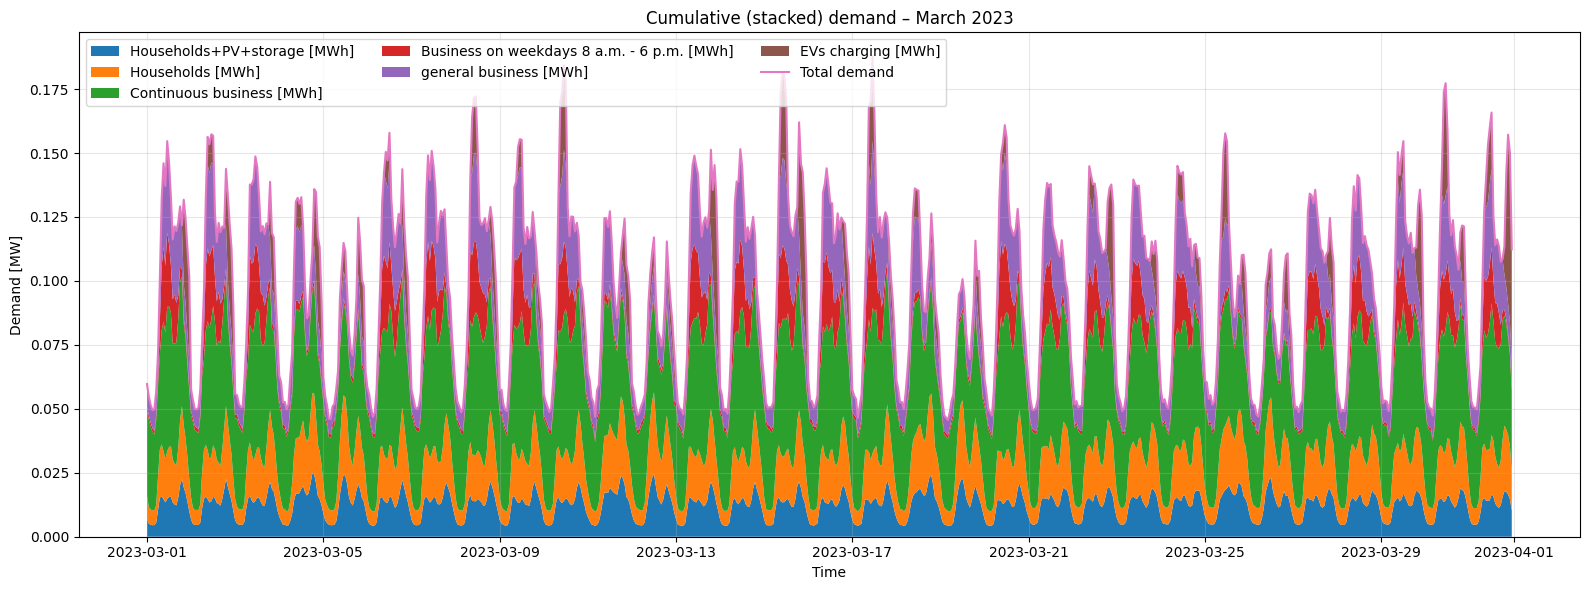

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


snapshots = pd.date_range("2023-03-01 00:00", "2023-03-31 23:00", freq="h")


df_Tot_demand = pd.DataFrame({
    "Households+PV+storage [MWh]": tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"],
    "Households [MWh]":            tot_Houshold["tot_demand_Houshold_variants_[MWh]"],
    "Continuous business [MWh]":  tot_flex_load["tot_demand_flex_load_variants_[MWh]"],
    "Business on weekdays 8 a.m. - 6 p.m. [MWh]": tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"],
    "general business [MWh]":  tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"],
    "EVs charging [MWh]":         Tot_EVs_charging["EVs demand [MWh]"],
}).reindex(snapshots).fillna(0).astype(float)

plt.figure(figsize=(16, 6))
plt.stackplot(df_Tot_demand.index, *(df_Tot_demand[col].values for col in df_Tot_demand.columns), labels=df_Tot_demand.columns)


total = df_Tot_demand.sum(axis=1)
plt.plot(df_Tot_demand.index, total, linewidth=1.5, label="Total demand")

plt.title("Cumulative (stacked) demand – March 2023")
plt.xlabel("Time")
plt.ylabel("Demand [MW]")
plt.legend(loc="upper left", ncol=3)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


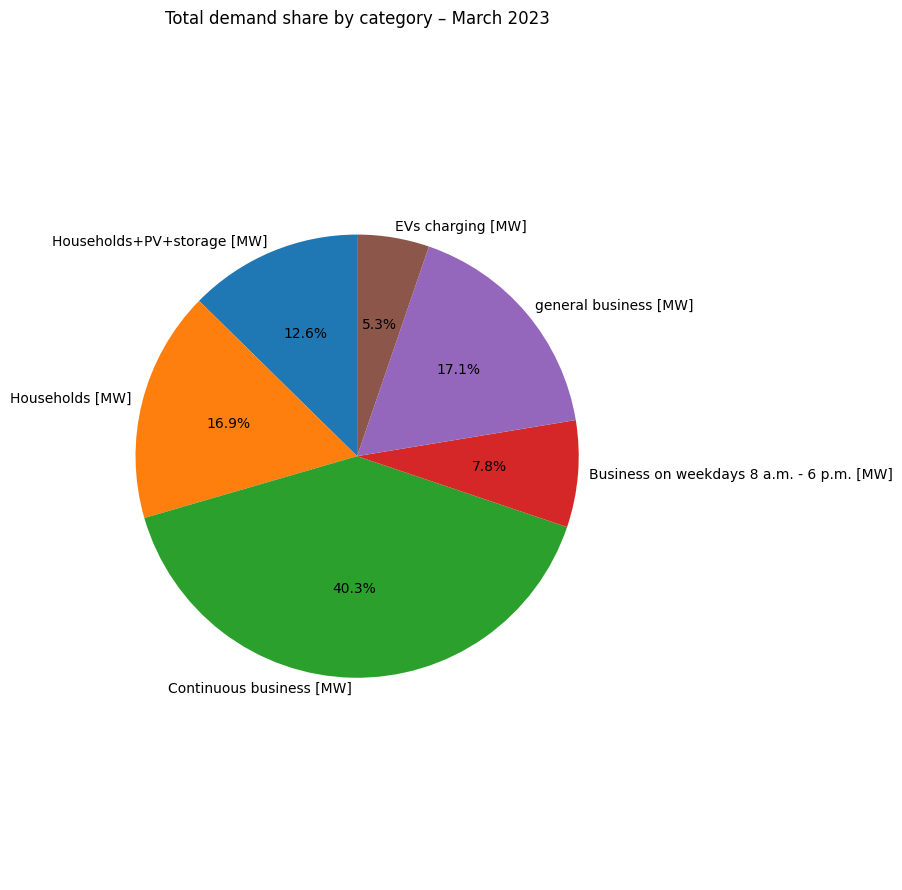

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

snapshots = pd.date_range("2023-03-01 00:00", "2023-03-31 23:00", freq="h")

series_map = {
    "Households+PV+storage [MW]": tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"].reindex(snapshots).fillna(0),
    "Households [MW]":            tot_Houshold["tot_demand_Houshold_variants_[MWh]"].reindex(snapshots).fillna(0),
    "Continuous business [MW]":   tot_flex_load["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots).fillna(0),
    "Business on weekdays 8 a.m. - 6 p.m. [MW]": tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"].reindex(snapshots).fillna(0),
    "general business [MW]":      tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"].reindex(snapshots).fillna(0),
    "EVs charging [MW]":          Tot_EVs_charging["EVs demand [MWh]"].reindex(snapshots).fillna(0),
}

totals = pd.Series({k: v.sum() for k, v in series_map.items()})

plt.figure(figsize=(9, 9))
plt.pie(
    totals.values,
    labels=totals.index,
    autopct="%1.1f%%",     # percentages only
    startangle=90,
    pctdistance=0.60,      # move % closer to center
    labeldistance=1.05     # move labels slightly out
)
plt.axis("equal")
plt.title("Total demand share by category – March 2023")
plt.tight_layout()
plt.show()


In [29]:
df_rated_biomass = pd.DataFrame(
    0.06,
    index=snapshots,
    columns=["power[MW]"]
)

df_rated_solar = pd.DataFrame(
    solar_gen["power[W]"].values,
    index=snapshots,
    columns=["power[MW]"]
)


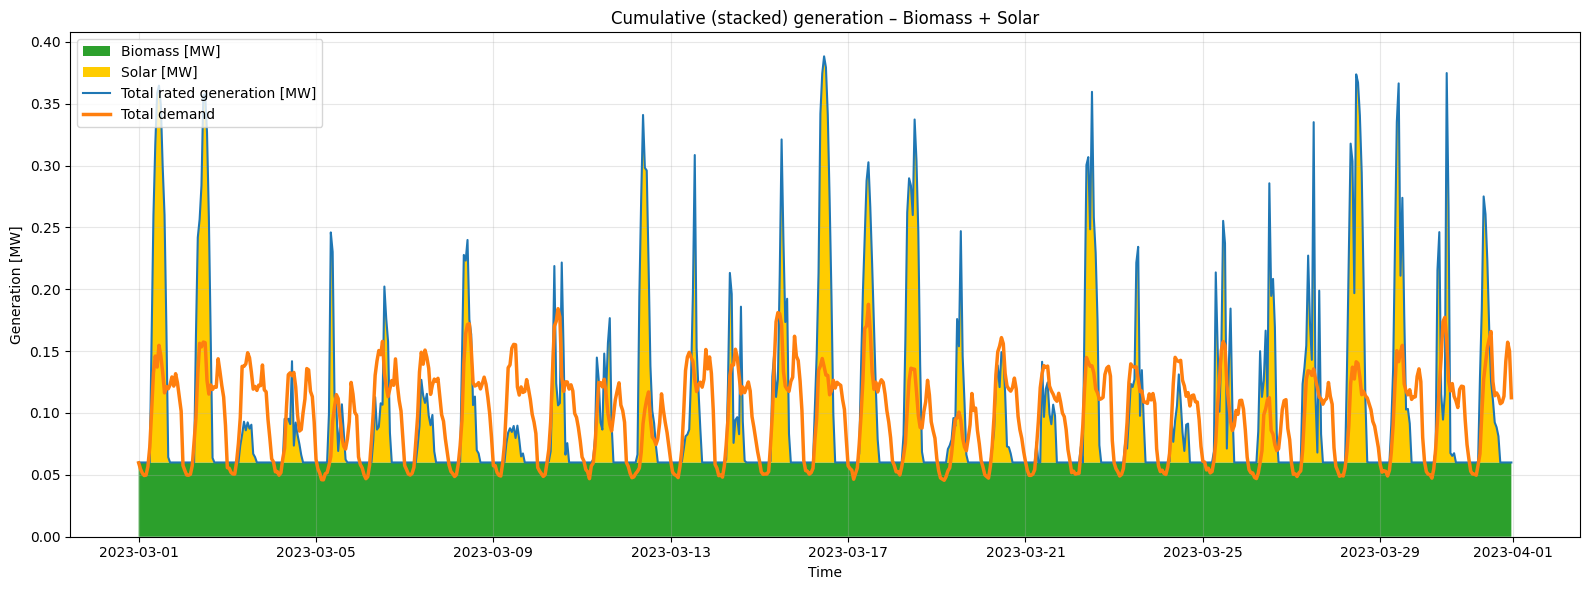

In [30]:
import matplotlib.pyplot as plt
import pandas as pd


df_dispatched_solar = net.generators_t.p["solar"]



df_rated_gen = pd.DataFrame({
    "Biomass [MW]": df_rated_biomass["power[MW]"],
    "Solar [MW]": df_rated_solar["power[MW]"]
})

plt.figure(figsize=(16, 6))
plt.stackplot(
    df_rated_gen.index,
    df_rated_gen["Biomass [MW]"].values,
    df_rated_gen["Solar [MW]"].values,
    labels=["Biomass [MW]", "Solar [MW]"],
    colors=["#2ca02c", "#ffcc00"]
)

total_gen = df_rated_gen.sum(axis=1)
plt.plot(df_rated_gen.index, total_gen, linewidth=1.5, label="Total rated generation [MW]")
plt.plot(df_Tot_demand.index, total, linewidth=2.5, label="Total demand")

plt.title("Cumulative (stacked) generation – Biomass + Solar")
plt.xlabel("Time")
plt.ylabel("Generation [MW]")
plt.legend(loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



# Discharging for 15 EVs

In [31]:
'''discharging_links = [f"EV{i+1}_discharge" for i in range(15)]
discharging_df = net.links_t.p0[discharging_links].copy()
discharging_df["total_discharging"] = discharging_df.sum(axis=1)
display(charging_df["total_charging"].sum())
display(discharging_df["total_discharging"].sum())'''

'discharging_links = [f"EV{i+1}_discharge" for i in range(15)]\ndischarging_df = net.links_t.p0[discharging_links].copy()\ndischarging_df["total_discharging"] = discharging_df.sum(axis=1)\ndisplay(charging_df["total_charging"].sum())\ndisplay(discharging_df["total_discharging"].sum())'

In [32]:
import matplotlib.pyplot as plt

'''fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(tou_price, color='tab:blue', label="Electricity Price")
ax1.set_xlabel("Time")
ax1.set_ylabel("Electricity Price [€/MWh]", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(discharging_df, color='tab:orange', label="Discharging Power")
ax2.set_ylabel("Discharging Power [kW or MW]", color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("Electricity Price and EV Discharging – March")
fig.tight_layout()
plt.grid(True)
plt.show()

#display(discharging_df.sum())
#display(charging_df.sum())'''

'fig, ax1 = plt.subplots(figsize=(12, 5))\n\nax1.plot(tou_price, color=\'tab:blue\', label="Electricity Price")\nax1.set_xlabel("Time")\nax1.set_ylabel("Electricity Price [€/MWh]", color=\'tab:blue\')\nax1.tick_params(axis=\'y\', labelcolor=\'tab:blue\')\n\nax2 = ax1.twinx()\nax2.plot(discharging_df, color=\'tab:orange\', label="Discharging Power")\nax2.set_ylabel("Discharging Power [kW or MW]", color=\'tab:orange\')\nax2.tick_params(axis=\'y\', labelcolor=\'tab:orange\')\n\nplt.title("Electricity Price and EV Discharging – March")\nfig.tight_layout()\nplt.grid(True)\nplt.show()\n\n#display(discharging_df.sum())\n#display(charging_df.sum())'

In [33]:
'''df_ch_dis = pd.DataFrame({
   
    "demand": df_EVs["power_consumption1_kW"]/1000,
    "avai": df_EVs["availability1"],
    #"EV1_char": net.links_t.p0["EV4_charge"],
    #"EV5_dis": net.links_t.p0["EV5_discharge"],
    "EV5_SOC": net.stores_t.e["EV1_store"]
    
    
}, index=net.snapshots)

df_ch_dis.iloc[50:100]'''



'df_ch_dis = pd.DataFrame({\n   \n    "demand": df_EVs["power_consumption1_kW"]/1000,\n    "avai": df_EVs["availability1"],\n    #"EV1_char": net.links_t.p0["EV4_charge"],\n    #"EV5_dis": net.links_t.p0["EV5_discharge"],\n    "EV5_SOC": net.stores_t.e["EV1_store"]\n    \n    \n}, index=net.snapshots)\n\ndf_ch_dis.iloc[50:100]'

In [34]:
#df_EVs["power_consumption1_kW"].sum()+df_EVs["power_consumption2_kW"].sum()+df_EVs["power_consumption3_kW"].sum()+df_EVs["power_consumption4_kW"].sum()+df_EVs["power_consumption5_kW"].sum()


In [35]:
display(net.generators_t.p["grid_generator"].sum())
display(net.generators_t.p["solar"].sum())
display(net.generators_t.p["Biomass"].sum())

np.float64(15.708993930893602)

np.float64(22.85944901664103)

np.float64(34.945044822846874)

In [36]:
display(Tot_demand.sum())
total_demand = Tot_demand.sum()
display(solar_gen["power[W]"].sum())
solar = solar_gen["power[W]"].sum()
display(df_rated_biomass["power[MW]"].sum())
biomass = df_rated_biomass["power[MW]"].sum()


np.float64(73.51348777037907)

np.float64(30.89586)

np.float64(44.640000000000015)

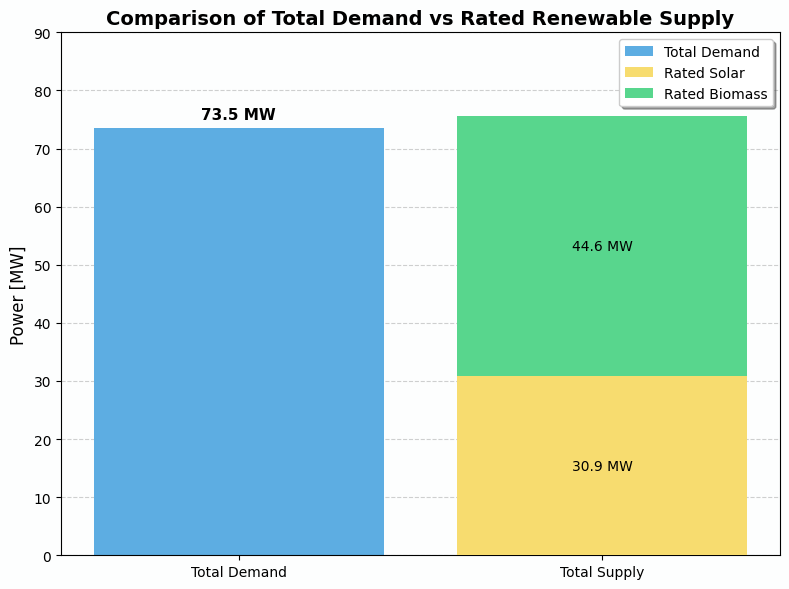

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(["Total Demand"], [total_demand], color="#5DADE2", label="Total Demand", zorder=2)
bars2 = ax.bar(["Total Supply"], [solar], color="#F7DC6F", label="Rated Solar", zorder=3)
bars3 = ax.bar(["Total Supply"], [biomass], bottom=[solar], color="#58D68D", label="Rated Biomass", zorder=3)

ax.text(0, total_demand + 1, f"{total_demand:.1f} MW", ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.text(1, solar / 2, f"{solar:.1f} MW", ha='center', va='center', fontsize=10)
ax.text(1, solar + biomass / 2, f"{biomass:.1f} MW", ha='center', va='center', fontsize=10)

ax.set_ylim(0, 90)
ax.set_ylabel("Power [MW]", fontsize=12)
ax.set_title("Comparison of Total Demand vs Rated Renewable Supply", fontsize=14, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)
ax.set_facecolor('#FDFEFE')
fig.patch.set_facecolor('#FDFEFE')

legend = ax.legend(loc="upper right", frameon=True, shadow=True, fontsize=10)
plt.tight_layout()
plt.show()


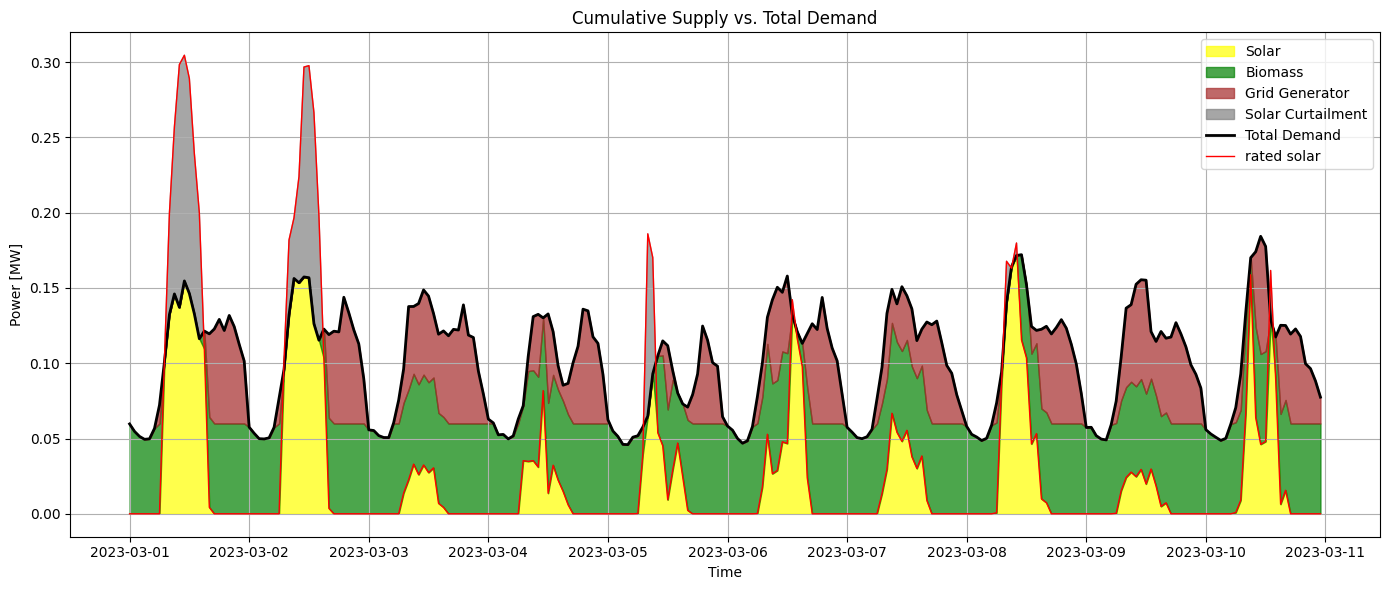

In [38]:
start_date = "2023-03-01"
end_date = "2023-03-10 23:00"

import numpy as np
import matplotlib.pyplot as plt


biomass = net.generators_t.p["Biomass"].squeeze().loc[start_date:end_date]
solar = net.generators_t.p["solar"].squeeze().loc[start_date:end_date]
grid = net.generators_t.p["grid_generator"].squeeze().loc[start_date:end_date]
#discharging = discharging_df["total_discharging"].squeeze().loc[start_date:end_date]
demand = Tot_demand.squeeze().loc[start_date:end_date]
rated_solar = solar_gen.squeeze().loc[start_date:end_date]
mask = rated_solar > demand



common_index = solar.index.intersection(biomass.index).intersection(grid.index).intersection(demand.index).intersection(rated_solar.index)
#common_index = solar.index.intersection(biomass.index).intersection(grid.index).intersection(discharging.index).intersection(demand.index)


# Align
biomass = biomass.loc[common_index]
solar = solar.loc[common_index]
grid = grid.loc[common_index]
#discharging = discharging.loc[common_index]
demand = demand.loc[common_index]


solar_cum = solar
biomass_cum = solar_cum + biomass
grid_cum = biomass_cum + grid
#discharge_cum = grid_cum + discharging


plt.figure(figsize=(14, 6))

plt.fill_between(common_index, 0, solar, label="Solar", alpha=0.7, color = "yellow")
plt.fill_between(common_index, solar, biomass_cum, label="Biomass", alpha=0.7, color = "green")
plt.fill_between(common_index, biomass_cum, grid_cum, label="Grid Generator", alpha=0.7, color = "brown")
#plt.fill_between(common_index, grid_cum, discharge_cum, label="EV Discharging", alpha=0.7, color = "blue")
plt.fill_between(common_index, demand, rated_solar,where=mask, interpolate=True,label="Solar Curtailment", alpha=0.7, color="grey")

plt.plot(common_index, demand, label="Total Demand", color="black", linewidth=2)
plt.plot(common_index, rated_solar, label="rated solar", color="red", linewidth=1)

plt.xlabel("Time")
plt.ylabel("Power [MW]")
plt.title("Cumulative Supply vs. Total Demand")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



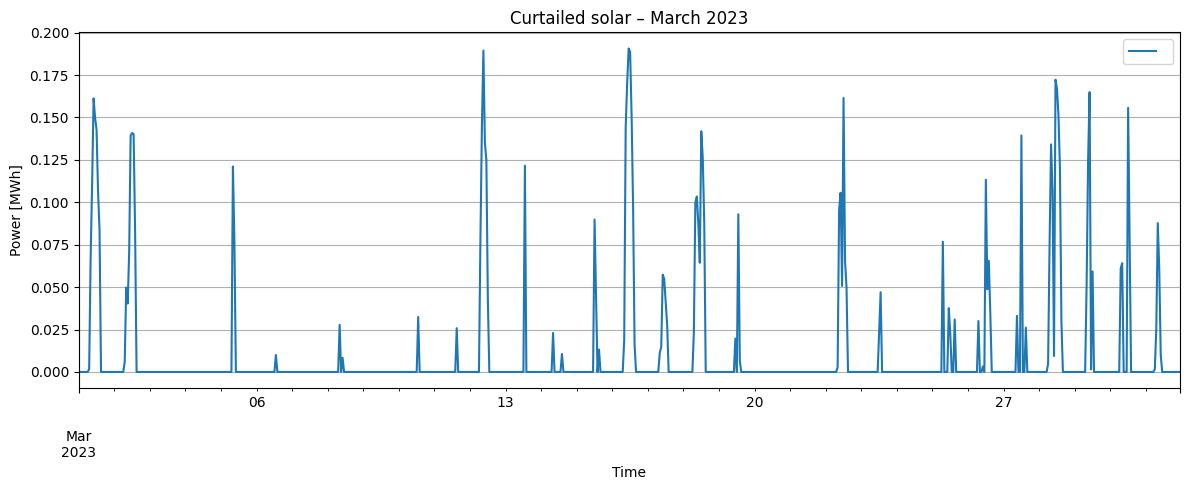

In [39]:
Solar_Curtailment=(solar_gen["power[W]"]-Tot_demand).clip(lower=0)
plt.figure(figsize=(12, 5))
Solar_Curtailment.plot(legend=True)
plt.title("Curtailed solar – March 2023")
plt.xlabel("Time")
plt.ylabel("Power [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
charging_df["total_charging"].sum()#+ Charging_df["total_Charging"].sum() + CHarging_df["total_CHarging"].sum()

np.float64(3.07212237379442)

In [41]:
g=net.generators_t.p["grid_generator"].loc["2023-03-01 14:00:00"]
b= net.generators_t.p["Biomass"].loc["2023-03-01 14:00:00"]
s= net.generators_t.p["solar"].loc["2023-03-01 14:00:00"]
display(g)
display(b)
display(s)

np.float64(0.0)

np.float64(0.0)

np.float64(0.11625004522639999)

In [42]:
Solar_Curtailment.sum()

np.float64(8.03641098335967)

In [43]:
solar = net.generators_t.p["solar"].sum()
solar

np.float64(22.85944901664103)

In [44]:
solar_gen.sum()

power[W]    30.89586
dtype: float64

In [45]:
Tot_demand.sum()               # 30.89 from solar deswegen ~ 45 must be covered by Biomass: 45/744=~ 0.06

np.float64(73.51348777037907)

In [46]:
net.generators_t.p["Biomass"].sum()

np.float64(34.945044822846874)

In [47]:
net.generators_t.p["grid_generator"].sum()

np.float64(15.708993930893602)

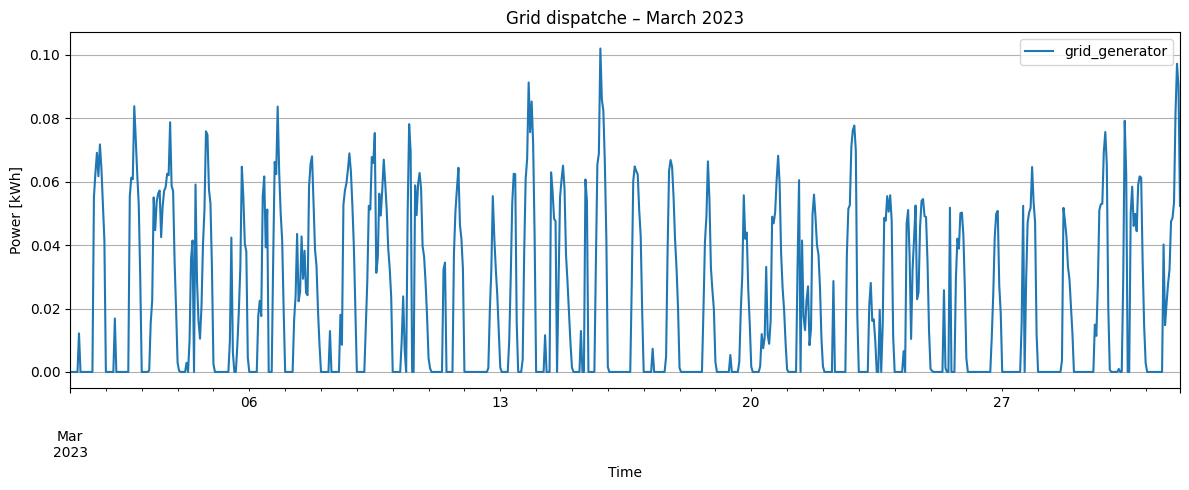

In [48]:
plt.figure(figsize=(12, 5))
net.generators_t.p["grid_generator"].plot(legend=True)
plt.title("Grid dispatche – March 2023")
plt.xlabel("Time")
plt.ylabel("Power [kWh]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
charging_df["total_charging"].loc["2023-03-06 13:00:00"]#+Charging_df["total_Charging"].loc["2023-03-06 13:00:00"]+CHarging_df["total_CHarging"].loc["2023-03-06 13:00:00"]

np.float64(0.0)

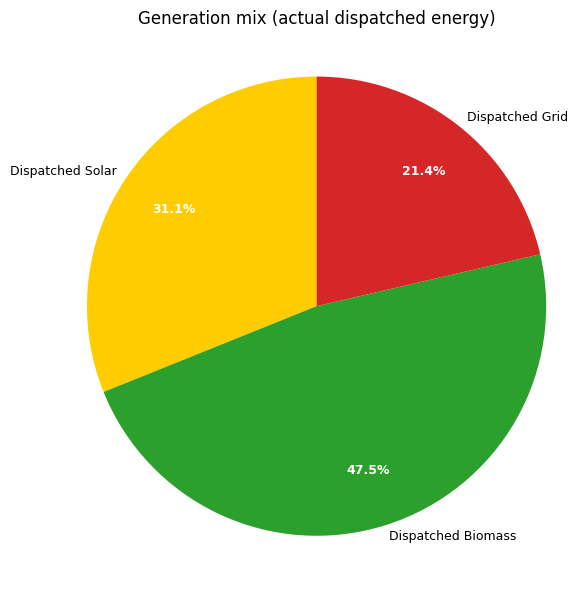

In [50]:
import matplotlib.pyplot as plt

# --- Supply breakdown (totals over the window; 1-hour steps ≈ MWh) ---
right_solar   = net.generators_t.p["solar"].sum()
right_biomass = net.generators_t.p["Biomass"].sum()
right_grid    = net.generators_t.p["grid_generator"].sum()

right_labels = ["Dispatched Solar", "Dispatched Biomass", "Dispatched Grid"]
right_sizes  = [right_solar, right_biomass, right_grid]
right_colors = ["#ffcc00", "#2ca02c", "#d62728"]  # yellow, green, red

# drop zero slices to avoid clutter
labels, sizes, colors = zip(*[(L,S,C) for L,S,C in zip(right_labels, right_sizes, right_colors) if S > 0])

# --- Plot single pie ---
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, colors=colors,
    autopct="%1.1f%%", startangle=90, pctdistance=0.75, labeldistance=1.05
)
ax.axis("equal")
ax.set_title("Generation mix (actual dispatched energy)")

# styling
for t in autotexts:
    t.set_color("white"); t.set_fontweight("bold"); t.set_fontsize(9)
for t in texts:
    t.set_fontsize(9)

plt.tight_layout()
plt.show()


In [51]:
net.buses_t.marginal_price.iloc[20:30]

Bus,grid,solar_bus,demand_Gewerbe,houshold,houshold_pv_storage,Landswirtschaftsbetriebe,flex_load,Biomass,tesla_model_3_1_bus,tesla_model_3_2_bus,...,vw_id7_3_bus,vw_id7_4_bus,bmw_i4_m50_1_bus,bmw_i4_m50_2_bus,bmw_i4_m50_3_bus,bmw_i4_m50_4_bus,benz_eqe_300_1_bus,benz_eqe_300_2_bus,benz_eqe_300_3_bus,benz_eqe_300_4_bus
snapshot,,,,,,,,,,,,,,,,,,,,,
2023-03-01 20:00:00,162.74,262.74,362.74,362.74,362.74,362.74,362.74,262.74,362.74,0.0,...,0.0,362.74,0.0,0.0,0.0,0.0,362.74,0.0,0.0,0.0
2023-03-01 21:00:00,144.85,244.85,344.85,344.85,344.85,344.85,344.85,244.85,344.85,0.0,...,0.0,344.85,0.0,0.0,0.0,0.0,344.85,0.0,0.0,0.0
2023-03-01 22:00:00,142.05,242.05,342.05,342.05,342.05,342.05,342.05,242.05,342.05,0.0,...,0.0,342.05,0.0,0.0,0.0,0.0,342.05,0.0,0.0,0.0
2023-03-01 23:00:00,131.51,231.51,331.51,331.51,331.51,331.51,331.51,231.51,331.51,0.0,...,0.0,331.51,0.0,0.0,0.0,0.0,331.51,0.0,0.0,0.0
2023-03-02 00:00:00,125.82,0.05,100.05,100.05,100.05,100.05,100.05,0.05,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2023-03-02 01:00:00,128.57,0.05,100.05,100.05,100.05,100.05,100.05,0.05,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2023-03-02 02:00:00,130.03,0.05,100.05,100.05,100.05,100.05,100.05,0.05,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2023-03-02 03:00:00,131.47,0.05,100.05,100.05,100.05,100.05,100.05,0.05,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2023-03-02 04:00:00,130.01,0.05,100.05,100.05,100.05,100.05,100.05,0.05,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [52]:
import pandas as pd
import numpy as np

# Get link dispatch and costs
link_dispatch = net.links_t.p0  # Power from source (bus0)
link_costs = net.links.marginal_cost

marginal_units = []

for snapshot in net.snapshots:
    # Get dispatch at this time step
    dispatch_now = link_dispatch.loc[snapshot]

    # Filter only links that dispatched power (> small threshold)
    used_links = dispatch_now[dispatch_now.abs() > 1e-5]

    if used_links.empty:
        marginal_units.append(None)
        continue

    # Get marginal costs of used links
    used_costs = link_costs[used_links.index]

    # Find the link with the **highest cost among those used**
    last_unit = used_costs.idxmax()
    marginal_units.append(last_unit)

# Create a DataFrame of results
marginal_unit_df = pd.DataFrame(marginal_units, index=net.snapshots, columns=["marginal_unit"])

# Preview
print(marginal_unit_df.head(10))


                          marginal_unit
snapshot                               
2023-03-01 00:00:00  Biomass_to_gewerbe
2023-03-01 01:00:00  Biomass_to_gewerbe
2023-03-01 02:00:00  Biomass_to_gewerbe
2023-03-01 03:00:00  Biomass_to_gewerbe
2023-03-01 04:00:00  Biomass_to_gewerbe
2023-03-01 05:00:00  Biomass_to_gewerbe
2023-03-01 06:00:00          to_gewerbe
2023-03-01 07:00:00    solar_to_gewerbe
2023-03-01 08:00:00    solar_to_gewerbe
2023-03-01 09:00:00    solar_to_gewerbe


In [53]:
import numpy as np
import pandas as pd

def _generator_mc_timeseries(n):
    """
    Returns a DataFrame mc_t indexed by snapshots, columns=generators,
    with the *effective* marginal cost per snapshot.
    If generators_t.marginal_cost exists, use it; otherwise broadcast static mc.
    """
    static_mc = n.generators["marginal_cost"]  # Series (€/MWh)
    # Start with static broadcast
    mc_t = pd.DataFrame(
        np.repeat(static_mc.values[None, :], len(n.snapshots), axis=0),
        index=n.snapshots, columns=n.generators.index
    )
    # If time-varying mc provided, overlay it
    if hasattr(n.generators_t, "marginal_cost"):
        mc_tv = n.generators_t.marginal_cost.reindex(index=n.snapshots, columns=n.generators.index)
        mc_t = mc_tv.combine_first(mc_t)  # prefer time-varying where present
    return mc_t

def marginal_cost_dataframe(n, eps=1e-5, tol=1e-3, exclude_at_upper=True):
    """
    Build a DataFrame with per-snapshot:
      - marginal_generators (list)
      - marginal_cost (float if unique, else NaN)
      - marginal_cost_set (set of floats for visibility)
      - ref_lmp (from first marginal gen's bus)
    Matching criterion: |mc_t(g,t) - LMP(bus(g),t)| < tol and p(g,t) > eps,
    optionally excluding units exactly at upper bound p_max(t).
    """
    gen_bus = n.generators["bus"]
    p_nom   = n.generators["p_nom"]

    # p_max(t) = p_nom * p_max_pu(t) if available
    pmax_t = pd.DataFrame(
        np.repeat(p_nom.values[None, :], len(n.snapshots), axis=0),
        index=n.snapshots, columns=n.generators.index
    )
    if hasattr(n.generators_t, "p_max_pu"):
        pmax_t = pmax_t.mul(n.generators_t.p_max_pu.fillna(1.0), fill_value=1.0)

    mc_t = _generator_mc_timeseries(n)                     # €/MWh per snapshot/gen

    rows = []
    for t in n.snapshots:
        price_t = n.buses_t.marginal_price.loc[t]          # €/MWh per bus
        pg_t    = n.generators_t.p.loc[t]                  # MW per generator
        used    = pg_t[pg_t > eps].index

        if len(used) == 0:
            rows.append({"snapshot": t, "marginal_generators": [], "marginal_cost": np.nan,
                         "marginal_cost_set": set(), "ref_lmp": np.nan})
            continue

        at_upper = np.isclose(pg_t[used].values, pmax_t.loc[t, used].values, atol=1e-6) if exclude_at_upper else np.zeros(len(used), dtype=bool)
        mc_u     = mc_t.loc[t, used].values
        bus_u    = gen_bus.loc[used].values
        pi_u     = price_t.reindex(bus_u).values

        is_marginal = (np.abs(mc_u - pi_u) < tol) & (~at_upper)
        gens = list(pd.Index(used)[is_marginal])

        if len(gens) == 0:
            rows.append({"snapshot": t, "marginal_generators": [], "marginal_cost": np.nan,
                         "marginal_cost_set": set(), "ref_lmp": np.nan})
            continue

        mcs = set(np.round(mc_t.loc[t, gens].values.astype(float), 6).tolist())
        g0  = gens[0]
        ref_lmp = price_t.loc[gen_bus.loc[g0]]

        rows.append({
            "snapshot": t,
            "marginal_generators": gens,
            "marginal_cost": list(mcs)[0] if len(mcs) == 1 else np.nan,
            "marginal_cost_set": mcs,
            "ref_lmp": ref_lmp,
        })

    return pd.DataFrame(rows).set_index("snapshot")
mc_df = marginal_cost_dataframe(net)
mc_df.head(20)

,marginal_generators,marginal_cost,marginal_cost_set,ref_lmp
snapshot,,,,
2023-03-01 00:00:00,[Biomass],0.05,{0.05},0.05
2023-03-01 01:00:00,[Biomass],0.05,{0.05},0.05
2023-03-01 02:00:00,[Biomass],0.05,{0.05},0.05
2023-03-01 03:00:00,[Biomass],0.05,{0.05},0.05
2023-03-01 04:00:00,[Biomass],0.05,{0.05},0.05
2023-03-01 05:00:00,[Biomass],0.05,{0.05},0.05
2023-03-01 06:00:00,[grid_generator],163.45,{163.45},163.45
2023-03-01 07:00:00,[solar],0.02,{0.02},0.02
2023-03-01 08:00:00,[solar],0.02,{0.02},0.02


# total chargin cost of EVs

In [54]:
revenue_EV = (net.buses_t.marginal_price["bmw_i4_m50_2_bus"]*net.links_t.p0["bmw_i4_m50_2_charge"])+(net.buses_t.marginal_price["bmw_i4_m50_2_bus"]*net.links_t.p0["bmw_i4_m50_2_Charge"])
revenue_EV.sum()

np.float64(74.70804)

# Revenue Solar

In [55]:
revenue_solar = net.buses_t.marginal_price["solar_bus"]*net.generators_t.p["solar"]
revenue_solar.sum()

np.float64(914.8464555003328)

# cost of flex Load

In [56]:
revenue_load = net.buses_t.marginal_price["flex_load"]*tot_flex_load["tot_demand_flex_load_variants_[MWh]"]
revenue_load.sum()

np.float64(6528.645057734122)

# cost of fixed load

In [57]:
Revenue_load = net.buses_t.marginal_price["houshold"]*tot_Houshold["tot_demand_Houshold_variants_[MWh]"]
Revenue_load.sum()

np.float64(2921.1428485869064)

# Total system cost

In [58]:
total_cost = float(net.objective)
print(total_cost)

10782.88339332918
